# Energy Height

$$
E_h = h+\frac{V^2_T}{2g}
$$

Where:

- $E_h$ Energy height (ft)
- $g$ Gravitational acceleration (32.17) (ft/s^2)
- $h$ Tapeline altitude (ft)


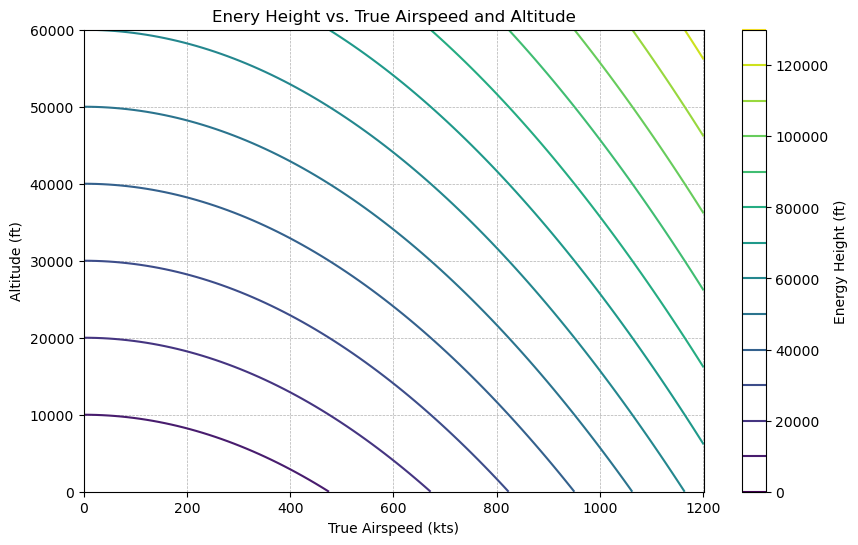

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set up
min_altitude = 0  # ft
max_altitude = 60000  # ft
min_v_t = 0  # kts
max_v_t = 1200  # kts

# Constants
knots_to_fps = 1.68781


def e_h(h, v_t, g=32.174):
    """
    Calculate the energy height.

    Energy height is not an altitude, rather the sum of the aircraft’s specific potential  and kinetic energies. It represents the altitude which the aircraft theoretically would be  capable of reaching in a zoom climb, if its kinetic energy were perfectly convertible to  potential energy without loss of any kind, and if it arrived at that altitude at zero airspeed.

    Parameters:
    h (float): The height (in meters).
    v_t (float): The true airspeed (in meters per second).

    Returns:
    float: The energy height (in meters).
    """
    return h + (v_t**2) / (2 * g)


V_t = np.linspace(min_v_t, max_v_t + 1, 100)
V_t_fps = V_t * knots_to_fps
H_p = np.linspace(min_altitude, max_altitude + 1, 10000)

# Create a meshgrid for plotting
V_t_grid, H_p_grid = np.meshgrid(V_t, H_p)

# Calculate energy height for each combination of V_t and H_p
E_h_grid = e_h(H_p_grid, V_t_fps)

# Plotting
plt.figure(figsize=(10, 6))
contour = plt.contour(V_t_grid, H_p_grid, E_h_grid, levels=12, cmap="viridis")
plt.colorbar(contour, label="Energy Height (ft)")
plt.xlabel("True Airspeed (kts)")
plt.ylabel("Altitude (ft)")
plt.title("Enery Height vs. True Airspeed and Altitude")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()